<a href="https://colab.research.google.com/github/vjanapaty/Estuarine_Research/blob/main/all_bands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install descartes 
!pip install geemap
!pip install folium
!pip install seaborn
!pip install wxee
!pip install eemont
!pip install geetools
!pip install datetime
!pip install dbf

In [ ]:
import os
from google.colab import drive
drive.mount('drive')
os.chdir('drive/MyDrive/2022 SNPS')

Mounted at drive


In [ ]:
#Import earth engine
import ee
 
# Trigger the authentication flow.
ee.Authenticate()
 
# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=qp8ZBDVjInbinyXd8rxXHpFQ07i-N8mY7DwHq0kUKSc&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWgBarPVFk32IdCnVNn6-81nEjXdSzStVaNkxcH-iF_XV9j4K0BS5ok

Successfully saved authorization token.


In [ ]:
import ee
import folium 
import numpy as np # yes, numpy!
import pandas as pd # yes, pandas!
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters
import pprint as pp
from google.colab import data_table
from vega_datasets import data
import json, geemap
import geopandas as gpd
from geetools import tools
from geetools import cloud_mask
from PIL import Image
import requests, zipfile, io
from IPython.display import Image
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


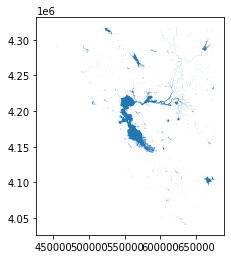

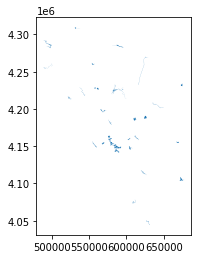

In [ ]:

shapefile2 = gpd.read_file("SHAPEFILES/Filtered_SF/water_bodies_carto.shp")



shapefile2.plot()
sf = shapefile2[(shapefile2.Acres > 500)]
sf = sf[(shapefile2.Acres < 2500)]
sf.plot()
sf
sf.to_file('SHAPEFILES/temp/abc.shp')

In [ ]:
shapefile2 = gpd.read_file("SHAPEFILES/WATER/water.shp")
sf = shapefile2.to_crs(epsg=4326)

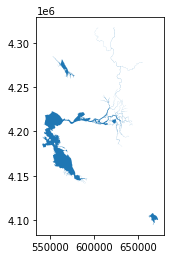

In [ ]:

shapefile2 = gpd.read_file("SHAPEFILES/ABC/abc.shp")



shapefile2.plot()

,ID,geometry
16,17,"POLYGON ((608134.368 4073387.744, 608188.608 4..."


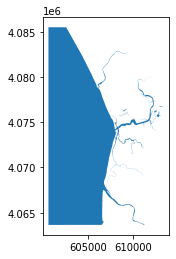

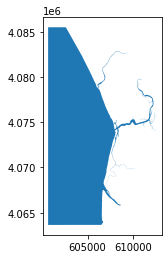

In [ ]:

shapefile2 = gpd.read_file("SHAPEFILES/WATER/water.shp")
#sf = shapefile2.to_crs(epsg=4326)

#poly = sf.loc[16,'geometry']
#print(poly)
#sf
#df.plot()
shapefile2.plot()
#sf = shapefile2.to_crs(epsg=4326)
#sf
df = shapefile2[(shapefile2.ID == 17)]
#df = df.to_crs(epsg=4326)
df.plot()
df


In [ ]:
import shapefile
sf = shapefile.Reader("SHAPEFILES/WATER/water_gcs.shp")
#sf = sf.to_crs(epsg=4326)
print(sf.bbox)
sf.fields
sf.shapeRecords()[16]

[-121.8731642141779, 36.71226059495127, -121.72885574919857, 36.91021058047958]


In [ ]:
w = shapefile.Writer('SHAPEFILES/new_elk/testfile')
bbox = [-121.813164, 36.71226059495127,-121.72885574919857, 36.91021058047958 ]
fields = list(sf.fields)
for shaperec in sf.iterShapeRecords(bbox=bbox, fields=fields):
    w.record(*shaperec.record)
    w.shape(shaperec.shape)

w.close()


In [ ]:
import shapefile
sf = shapefile.Reader("SHAPEFILES/WATER/water.shp")
sf.shapeType
sf.bbox
#sf = sf.to_crs(epsg=4326)
#sf.shapeType
#len(sf)
shapes = sf.shapes()

print(shapes[16].parts)

len(shapes[16].points)
shape1 = shapes[16].points[55]
shape2 = shapes[16].points[55]
['%.3f' % coord for coord in shape1]
#['%.3f' % coord for coord in shape2]
rec = shapes[16].points[0:25]
len(shapes[16].points)


In [ ]:
shapes[16].points = rec
len (shapes[16].points)
len(shapes[16].parts)


3

In [ ]:
sf.shapeRecords()[16]
len(list(sf.iterRecords()))
shapeRecs = sf.shapeRecords()
len(sf.shapeRecords()[16].shape.points)

2360

In [ ]:
sf.shapeRecords()[16].shape.points[55:]

In [ ]:
import shapefile
sf = shapefile.Reader("SHAPEFILES/WATER/water.shp")
w = shapefile.Writer(sf.shapeType)
# This line will give us the same dbf schema
w.fields = r.fields
# Use the original bounding box as a place holder in the header
w.bbox = lambda: [-121.813164, 36.71226059495127,-121.72885574919857, 36.91021058047958 ]
w.save('SHAPEFILES/new_elk/testfile')

In [ ]:
shapes[16].points

In [ ]:
w = shapefile.Writer('SHAPEFILES/new_elk/testfile')
w.field('ID', 'N')
pts = shapes[16].points
w.poly(pts)
w.record('polygon1')

In [ ]:
r = shapefile.Reader("SHAPEFILES/WATER/water")
w = shapefile.Writer('SHAPEFILES/new_elk/testfile')

#w.shapeType = 5
w.fields = r.fields[1:]
i = 0
for shaperec in r.iterShapeRecords():
  if i <16:
    w.record(*shaperec.record)
    w.shape(shaperec.shape)
  else:
    break
  i = i + 1


w.close()

In [ ]:
r = shapefile.Reader('SHAPEFILES/new_elk/testfile.shp')
r.shapes()

Shapes: [Shape #0: POLYGON, Shape #1: POLYGON, Shape #2: POLYGON, Shape #3: POLYGON, Shape #4: POLYGON, Shape #5: POLYGON, Shape #6: POLYGON, Shape #7: POLYGON, Shape #8: POLYGON, Shape #9: POLYGON, Shape #10: POLYGON, Shape #11: POLYGON, Shape #12: POLYGON, Shape #13: POLYGON, Shape #14: POLYGON, Shape #15: POLYGON, Shape #16: POLYGON]

In [ ]:
def image_download(image,climatology, point,image_res,n_pixels,folder_name, image_name, storage="local"):
    
    """
    Function to download satellite images from a ee.imageCollection object.
    We first generate a bounding box of image_res*n_pixels meters around "point",
    then we clip that region from the image collection, take the mean image from the collection,
    and send that as a task to the Google Earth Engine. 
    After that, we download the image Google Cloud Storage if storage=="Cloud", 
    to Google Drive if storage=="Drive" or to a local folder if storage=="local".
    
    Inputs:
    -image= ee.ImageCollection object
    -climatology - True or False. If true will not filter the object using filterBounds
    -point= ee.Geometry.Point object
    -image_res= resolution of the image in meters
    -n_pixels= number of pixels to extract on the images
    -storage= string indicating if we are storing the images in Google Cloud,Google Drive or locally.
              Defaults to local storage.
    -folder_name= string with Google Cloud bucket name if storage=="Cloud"
                  string with the name of a folder in the root of Google Drive if storage=="Drive"
                  string with the path to the image if storage=="local"
    -image_name= string with the image_name for the TIFF image.

    Output:
     When storage=="Cloud" or storage=="Drive":
     -task= an EE task object. we can then use task.status() to check the status of the task.
     If the task is completed, we will see a TIFF image in "folder_name" with name "image_name.tif".
     The image has 3 dimensions, where the first 2 are n_pixels, and the 3rd is the number of bands of "image".
     When storage=="local":
     -there is no output, but we will see one TIFF file per band of our image in the folder "folder_name".
    """
    #generating the box around the point
    len=image_res*n_pixels # for landsat, 30 meters * 224 pixels
    region= point.buffer(len/2).bounds().getInfo()['coordinates']
    #defining the rectangle
    coords=np.array(region)
    #taking min and maxs of coordinates to define the rectangle
    coords=[np.min(coords[:,:,0]), np.min(coords[:,:,1]), np.max(coords[:,:,0]), np.max(coords[:,:,1])]
    rectangle=ee.Geometry.Rectangle(coords)
    
    if not(climatology):
      image=image.filterBounds(rectangle).mean()

    if storage=="Cloud":
        #generating the export task (dimensions is "WIDTHxHEIGHT")
        task=ee.batch.Export.image.toCloudStorage(image, 
                            bucket=folder_name, 
                            description=image_name, 
                            region=str(region), dimensions=str(n_pixels)+"x"+str(n_pixels))
        #starting the task
        task.start()
        return task
    
    if storage=="Drive":
        #generating the export task (dimensions is "WIDTHxHEIGHT")
        task=ee.batch.Export.image.toDrive(image=image, 
                            folder=folder_name, 
                            description=image_name,
                            fileFormat= 'GeoTIFF',
                            region=str(region), dimensions=str(n_pixels)+"x"+str(n_pixels)+"x"+str(10))
        #starting the task
        task.start()
        return task
    
    if storage=="local":
        #downloading the image
        r=requests.get( image.filterBounds(rectangle).mean().getDownloadURL({
                            'name': image_name, 
                            'region': str(region),
                            'dimensions': str(n_pixels)+"x"+str(n_pixels)+"x"+str(10)}))
        #unzip it to the selected directory
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall(folder_name)

In [ ]:



visparams = {
    'palette': ['ff3f06', 'f0ff06', '08ff26', '0afff4', '0000ff'],
    'min':-1,'max':1
    }


#clip out elkhorn
def clip_image(image):  #Need to add mask here
  return image.clip(elkhorn)




elkmap = geemap.Map(center=[36.8058,-121.790],zoom=13)
#elkhorn = geemap.shp_to_ee("SHAPEFILES/SFBay/water_bodies_carto_gcs.shp")
elkhorn = geemap.shp_to_ee("SHAPEFILES/WATER/water_gcs.shp")
#elkhorn = geemap.shp_to_ee("SHAPEFILES/Shree/myboundary.shp")
#defining image
startDate = '1999-05-28' #FIRST DATE THAT LANDSAT 7 IS AVAILABLE
endDate = '2021-12-31'

landsat = ee.ImageCollection("LANDSAT/LE07/C01/T1_TOA")
# filter date
landsat = landsat.filterDate(startDate, endDate)


#applying cloud masking
landsat_masked=landsat.map( cloud_mask.landsatSR(['cloud']) )
#apply clipping
landsat_clipped = landsat_masked.map(clip_image)




elkCloudless = landsat.map(clip_image)
elkmap.addLayer(elkCloudless)
elkmap.addLayer(elkhorn, {}, 'Elkhorn')

elkmap

Map(center=[36.8058, -121.79], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

In [ ]:
#defining the oval as a point
oval=ee.Geometry.Point(-121.755,36.832)
n_pixels=280
#RUN THIS FOR DOWNLOADING A SINGLE TIFF FILE
image_download(image=landsat, climatology=False, point=oval,image_res=30,n_pixels=260,\
               folder_name='LS7_images', image_name='test_image_all_bands', storage="Drive")

<Task HVN5U7TL2IVRZDAXPPNR7PQR EXPORT_IMAGE: test_image_all_bands (UNSUBMITTED)>

In [ ]:
landsat.first().bandNames().getInfo()

['B1', 'B2', 'B3', 'B4', 'B5', 'B6_VCID_1', 'B6_VCID_2', 'B7', 'B8', 'BQA']

In [ ]:
#This one is most current
# We cannot do poi_image for every image, instead mean image must be for for an image collection as a whole

months = ee.List.sequence(1, 12)
#years = ee.List.sequence(1999, 2022)
# This routine calculates climatology for all the years 2013 - 2022
# It will generate 12 images that represent the climatology across 2013 - 2022

def filter_by_month(m):
  landsat_per_month = landsat.filter(ee.Filter.calendarRange(m, m, 'month'))
  #filter_by_month(m)
  mean_image = ee.Image(landsat_per_month.reduce(reducer=ee.Reducer.mean()))
  #print(mean_image.getInfo())
  return mean_image.set('month', m)
#  .set('system:time_start', ee.Date.fromYMD(y,m, 5))

# To test for single image
#image = filter_by_month(7)
#print(image.getInfo())


landsat_climatology_byMonth = ee.ImageCollection.fromImages(months.map(filter_by_month).flatten())
p = pp.PrettyPrinter(indent=4)

print(landsat_climatology_byMonth.size().getInfo())
p.pprint(landsat_climatology_byMonth.first().getInfo())


In [ ]:

#This one is most current
# We cannot do poi_image for every image, instead mean image must be for for an image collection as a whole
# This code gets monthly averages per year
# Note JAn - Apr 1999 had no landsat 7 data; certains months in 2003 also had landsat 7 failures
# This is handled in def by_year_anomaly(y) by returning the climatology itself is ndwi data isn't present

months = ee.List.sequence(1, 12)
years = ee.List.sequence(1999, 2021)

def filter_by_year(y):
  landsat_per_year = landsat.filter(ee.Filter.calendarRange(y, y, 'year'))
  def filter_by_month(m):
    landsat_per_month = landsat_per_year.filter(ee.Filter.calendarRange(m, m, 'month'))
    mean_image = ee.Image(landsat_per_month.reduce(reducer=ee.Reducer.mean()))
    #print(mean_image.getInfo())
    image = ee.Image(mean_image.set('month', m).set('year', y)
                    .set('system:time_start', ee.Date.fromYMD(y,m, 5)))
    image2 = ee.Image(landsat_climatology_byMonth.filter(ee.Filter.eq('month', m)).first().set('year', y)
                    .set('system:time_start', ee.Date.fromYMD(y,m, 5))) # This represents the monthly climatology
    image = ee.Algorithms.If(ee.Number(image.bandNames().size()).gt(0),
                          image,
                          image2) # send back the climatology image if image doesn't exist due to landsat 7 issues
    return image
  return months.map(filter_by_month)

# Debugging test for single year
#images = filter_by_year(1999)
#print(images.size().getInfo())
#print(images.getInfo())
# For all images
landsat_byYear_byMonth = ee.ImageCollection.fromImages(years.map(filter_by_year).flatten())

# Very Useful
#landsat_byYear_byMonth.first().bandNames().size().getInfo()

print(str(landsat_byYear_byMonth.size().getInfo()) + " images generated")
p = pp.PrettyPrinter(indent=4)
p.pprint(landsat_byYear_byMonth.first().getInfo())


#print(landsat_climatology_byMonth.first().getInfo())



In [ ]:
# Prerequisite : requires filter_by_year to be run
#months = ee.List.sequence(1, 12)
#years = ee.List.sequence(1999, 2021) Commented out because it should be same as filter_by_year
# If the ee.Algorithms.If isn't present the following error occurs -
# EEException: Image.subtract: If one image has no bands, the other must also have no bands. Got 0 and 1.

# image1 = image2 if landsat 7 didn't have the image
# This is taken care of in filter_by_year

def by_year_anomaly(y):
  landsat_per_year = landsat_byYear_byMonth.filter(ee.Filter.eq('year',y))
  def by_month_anomaly(m):
    image1 = ee.Image(landsat_per_year.filter(ee.Filter.eq('month', m)).first()) # This represents the monthly average for year y
    image2 = ee.Image(landsat_climatology_byMonth.filter(ee.Filter.eq('month', m)).first()) # This represents the monthly climatology
    diff = image1.subtract(image2)
    diff = ee.Image(diff)
    return diff.set('month', m).set('year', y)
  return months.map(by_month_anomaly)

anomaly_byYear_byMonth = ee.ImageCollection.fromImages(years.map(by_year_anomaly).flatten())

print(str(anomaly_byYear_byMonth.size().getInfo())+ " images generated")
p = pp.PrettyPrinter(indent=4)
p.pprint(anomaly_byYear_byMonth.first().getInfo())
p.pprint(landsat_climatology_byMonth.first().getInfo())

In [ ]:

#Function get_image_mean calcultes the mean of an image and prepares the dictionary for export to csv file
#Shree
def get_image_mean(img):
  dict_1 = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=elkhorn, scale=30)
  month = img.get('month')
  year = img.get('year')
  dict_2 = ee.Dictionary({
    'month': month,
    'year': year
  })
  result = dict_1.combine(dict_2)
  return ee.Feature(None, result) 

def get_image_anomaly_mean(img):
  dict_1 = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=elkhorn, scale=30)
  month = img.get('month')
  year = img.get('year')
  dict_2 = ee.Dictionary({
    'month': month,
    'year': year
  })
  result = dict_1.combine(dict_2)
  return ee.Feature(None, result)

avg_anomaly = anomaly_byYear_byMonth.map(get_image_anomaly_mean)
p = pp.PrettyPrinter(indent=4)
print(avg_anomaly.size().getInfo())
p.pprint(avg_anomaly.first().getInfo())
task=ee.batch.Export.table.toDrive(collection=avg_anomaly,folder='All_Bands_CSV_files',description='all_bands_avg_anomaly',fileFormat='CSV')
task_id = task.start()
print(task_id)

avg_monthly = landsat_byYear_byMonth.map(get_image_mean)
p = pp.PrettyPrinter(indent=4)
print(avg_monthly.size().getInfo())
p.pprint(avg_monthly.first().getInfo())
task=ee.batch.Export.table.toDrive(collection=avg_monthly,folder='All_Bands_CSV_files',description='all_bands_avg_monthly',fileFormat='CSV')
task_id = task.start()
print(task_id)

#made change for column name untested

# To test for single file for debugging
#listOfImages = anomaly_byYear_byMonth.toList(anomaly_byYear_byMonth.size())
#img = ee.Image(listOfImages.get(4))
#print(img.getInfo())
#feat = get_image_mean(img)
#print(feat.getInfo())



276
{   'geometry': None,
    'id': '0',
    'properties': {   'B1_mean': 0,
                      'B2_mean': 0,
                      'B3_mean': 0,
                      'B4_mean': 0,
                      'B5_mean': 0,
                      'B6_VCID_1_mean': 0,
                      'B6_VCID_2_mean': 0,
                      'B7_mean': 0,
                      'B8_mean': 0,
                      'BQA_mean': 0,
                      'month': 1,
                      'year': 1999},
    'type': 'Feature'}
None
276
{   'geometry': None,
    'id': '0',
    'properties': {   'B1_mean': 0.1566486300998306,
                      'B2_mean': 0.12385985009978019,
                      'B3_mean': 0.10860072484226882,
                      'B4_mean': 0.1262694365874893,
                      'B5_mean': 0.08649399478684354,
                      'B6_VCID_1_mean': 278.562097313425,
                      'B6_VCID_2_mean': 278.63732958506955,
                      'B7_mean': 0.05582033967017699,
    

In [ ]:
import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/PADILLA/avg_anomaly_pad.csv')
df.rename(columns={'B1_mean': 'B1_anomaly', 'B2_mean': 'B2_anomaly', 'B3_mean': 'B3_anomaly'
, 'B4_mean': 'B4_anomaly', 'B5_mean': 'B5_anomaly', 'B6_VCID_1_mean': 'B6_VCID_1_anomaly', 'B6_mean': 'B6_anomaly'
, 'B7_mean': 'B7_anomaly', 'B8_mean': 'B8_anomaly', 'BQA_mean': 'BQA_anomaly'}, inplace=True)

df.drop('.geo', 1, inplace=True)
df.to_csv('All_Bands_CSV_files/PADILLA/avg_anomaly_pad_1.csv')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [ ]:
# Must only be run if new VI files were created
import time
def cleanup_file (filename):
  infile = 'All_Bands_CSV_files/PADILLA/'+filename
  df_vi = pd.read_csv(open(infile,'r'), encoding='utf-8', engine='c')
  df_vi["month"] = df_vi["month"].astype(int).map("{:02}".format).astype(str)
  df_vi["year"] = df_vi["year"].astype(int).astype(str)
  cols=["year","month"]

  date = df_vi[cols].apply(lambda x: '-'.join(x.values), axis="columns")

  df_vi = df_vi.drop('year', 1) # where 1 is the axis number (0 for rows and 1 for columns.)
  df_vi = df_vi.drop('month', 1)
  #df_vi = df_vi.drop('.geo', 1)

  df_vi.insert(loc=0, column='Date', value=date)
  df_vi.reset_index(drop=True, inplace=True)
  df_vi = df_vi.drop('system:index',1)

  df_vi.head(5)
  outfile = 'All_Bands_CSV_files/PADILLA/' +filename
  df_vi.to_csv(outfile)
  time.sleep(2)



filenames = ['avg_anomaly_pad_1.csv', 'avg_monthly_pad.csv']

for file in filenames:
  cleanup_file(file)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [ ]:
right = pd.read_csv('From_Elkhorn_CSV/mean_all_NUT_merged.csv')
right.head(5)

df_join_no_duplicates = left.set_index('Date').join(right.set_index('Date'))

df_join_no_duplicates.to_csv('All_Bands_CSV_files/all_ELK_Merged.csv')

In [ ]:
ls All_Bands_CSV_files/SOUTH/all_bands_avg_anomaly_south_1.csv

All_Bands_CSV_files/SOUTH/all_bands_avg_anomaly_south_1.csv


In [ ]:
from re import I
#Merges all the VI files with ELK files
def merge_file(file, left):
  filename = 'All_Bands_CSV_files/PADILLA/' + file
  print(filename)
  right = pd.read_csv(filename)
  right.head(5)
  #result = pd.merge(left, right)
  left = pd.merge(left, right, on='Date')
  
  if 'Unnamed: 0' in left.columns:
    left = left.drop('Unnamed: 0', 1)

  return(left)


filenames = ['avg_anomaly_pad_1.csv', 'avg_monthly_pad.csv']
left = pd.read_csv('All_Bands_CSV_files/PADILLA/all_PADILLA_Merged.csv')
for file in filenames:
  left = merge_file(file, left)


left.head(5)


left.to_csv('All_Bands_CSV_files/PADILLA/all_PADILLA_SI_Merged.csv')

All_Bands_CSV_files/PADILLA/avg_anomaly_pad_1.csv
All_Bands_CSV_files/PADILLA/avg_monthly_pad.csv


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


In [ ]:
df = pd.read_csv('All_Bands_CSV_files/PADILLA/all_PADILLA_SI_Merged.csv')
df.rename(columns={'Temp_mean': 'PADILLA_Temp_mean', 'Temp_anomaly': 'PADILLA_Temp_anomaly', 'SpCond_mean': 'PADILLA_SpCond_mean'
, 'SpCond_anomaly': 'PADILLA_SpCond_anomaly', 'Sal_mean': 'PADILLA_Sal_mean', 'Sal_anomaly': 'PADILLA_Sal_anomaly', 'DO_mgl_mean': 'PADILLA_DO_mgl_mean'
, 'DO_mgl_anomaly': 'PADILLA_DO_mgl_anomaly', 'pH_mean': 'PADILLA_pH_mean', 'pH_anomaly': 'PADILLA_pH_anomaly'
, 'Turb_mean': 'PADILLA_Turb_mean', 'Turb_anomaly': 'PADILLA_Turb_anomaly', 'PO4F_mean': 'PADILLA_PO4F_mean'
, 'PO4F_anomaly': 'PADILLA_PO4F_anomaly', 'NH4F_mean': 'PADILLA_NH4F_mean', 'NH4_anomaly': 'PADILLA_NH4_anomaly'
, 'NO2F_mean': 'PADILLA_NO2F_mean', 'NO2F_anomaly': 'PADILLA_NO2F_anomaly', 'NO3F_mean': 'PADILLA_NO3F_mean'
, 'NO23F_mean': 'PADILLA_NO23F_mean', 'NO23F_anomaly': 'PADILLA_NO23F_anomaly', 
'NO3F_anomaly': 'PADILLA_NO3F_anomaly', 'CHLA_N_mean': 'PADILLA_CHLA_N_mean', 
'CHLA_N_anomaly': 'PADILLA_CHLA_N_anomaly'
}, inplace=True)

#df.drop('.geo', 1, inplace=True)
df.to_csv('All_Bands_CSV_files/PADILLA/all_Merged_1.csv')

In [ ]:
df = pd.read_csv('All_Bands_CSV_files/PADILLA/all_Merged_1.csv')
df = df.drop('Unnamed: 0.1', 1)
df = df.drop('.geo', 1)
df = df.drop('Unnamed: 0', 1)
df = df.drop('Unnamed: 0.1.1', 1)
df.to_csv('All_Bands_CSV_files/PADILLA/all_Merged_1.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
df = pd.read_csv('All_Bands_CSV_files/all_Merged_1.csv', skiprows=[i for i in range(1,6)])
df = df.drop('BQA_mean', 1)
df = df.drop('BQA_anomaly', 1)
df = df.drop('B6_VCID_1_mean', 1)
df = df.drop('B6_VCID_1_anomaly', 1)
df = df.drop('B8_anomaly', 1)
df = df.drop('B8_mean', 1)
df = df.drop('ELK_NO3F_mean', 1)
df = df.drop('ELK_NO3F_anomaly', 1)
df = df.drop('ELK_NO2F_anomaly', 1)
df = df.drop('ELK_NO2F_mean', 1)
df = df.drop('Unnamed: 0.1', 1)
df.head(5)
df.to_csv('All_Bands_CSV_files/all_Merged_clean.csv')

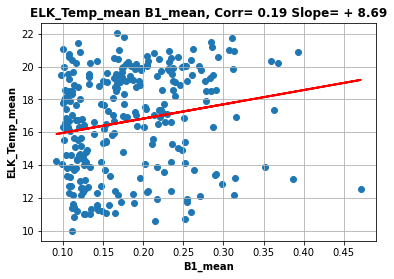

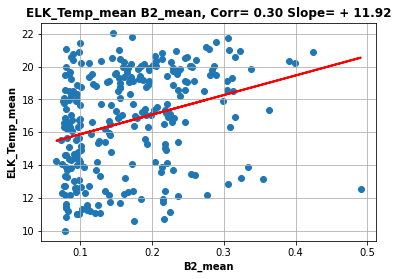

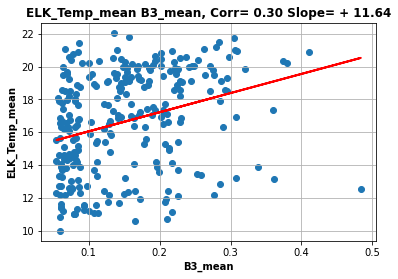

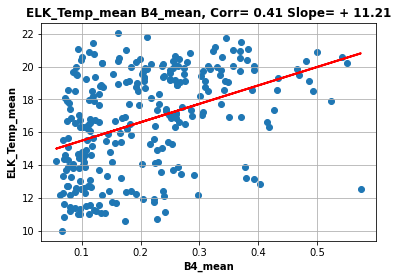

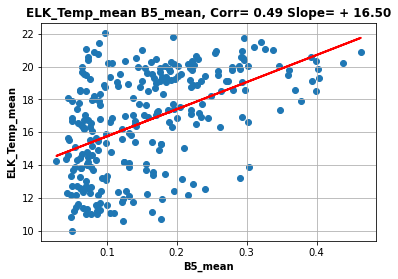

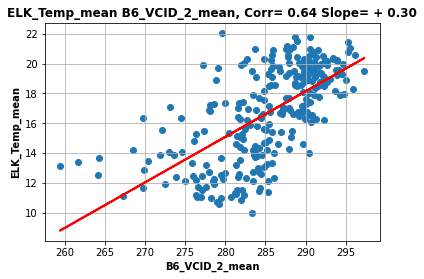

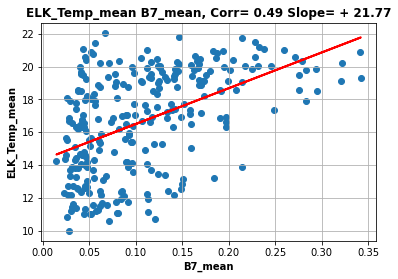

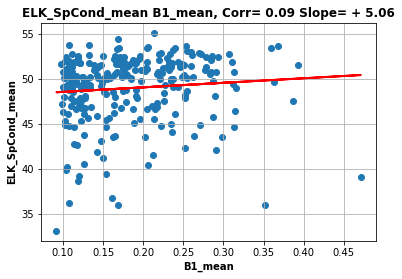

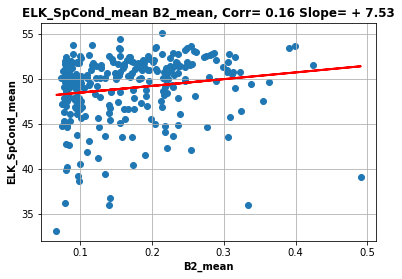

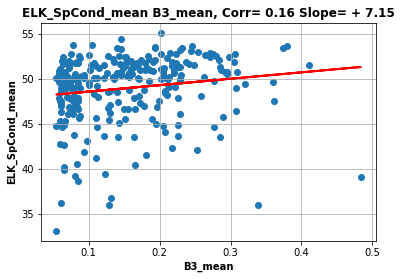

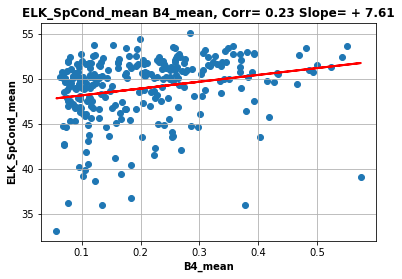

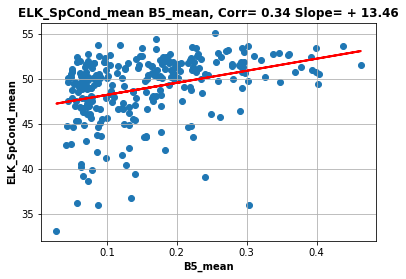

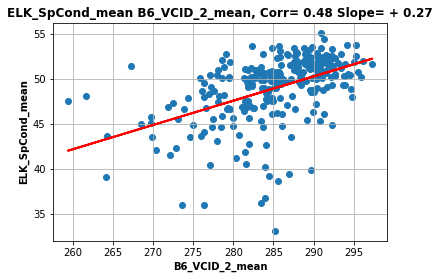

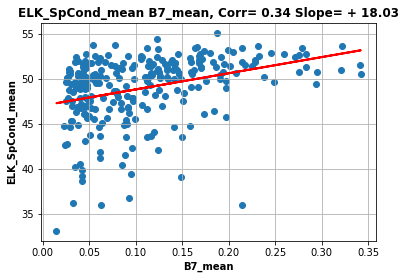

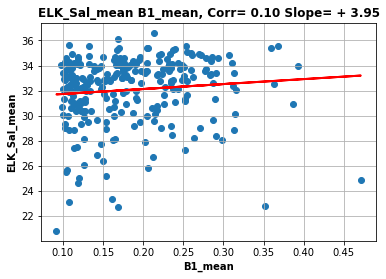

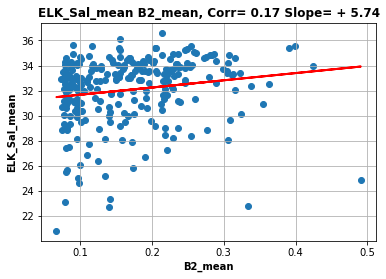

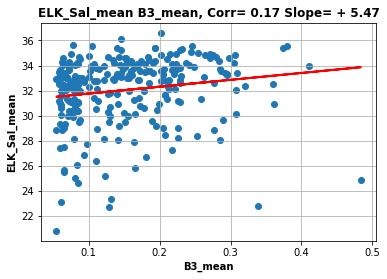

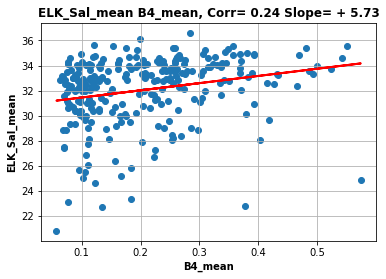

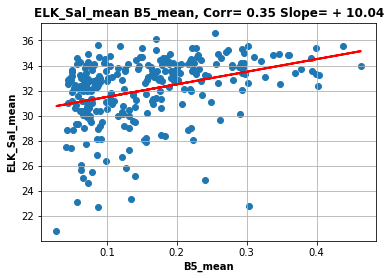

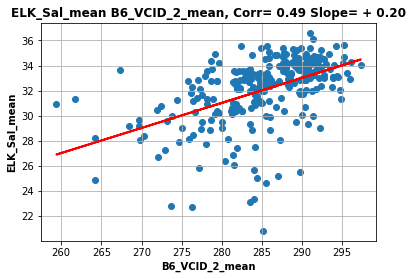

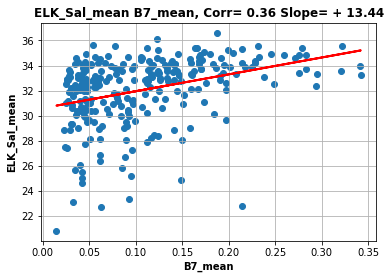

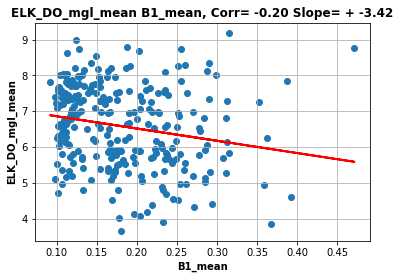

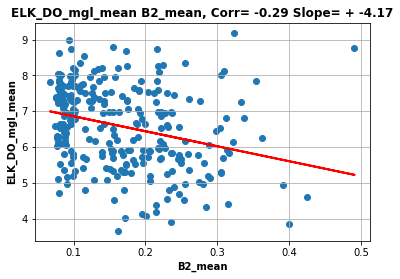

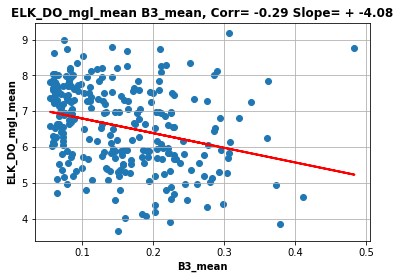

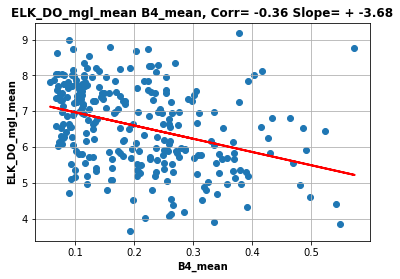

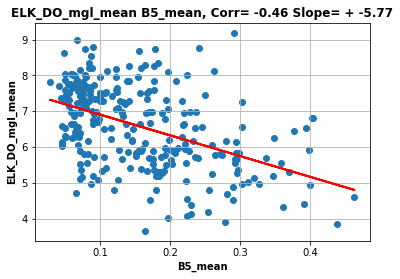

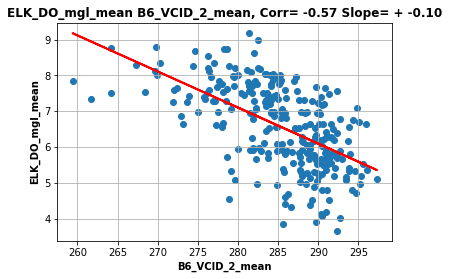

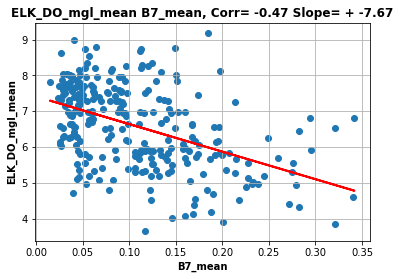

In [ ]:
import pandas as pd




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Satellite_indices = ['B1_mean', 'B2_mean', 'B3_mean', 'B4_mean', 'B5_mean'
                    , 'B6_VCID_2_mean', 'B7_mean']
outputs = ['ELK_Temp_mean', 'ELK_SpCond_mean', 'ELK_Sal_mean', 'ELK_DO_mgl_mean']

#data = pd.read_csv('A_CSV_files/Merged_ELKNMNUT.csv')
inputDf = pd.read_csv('All_Bands_CSV_files/all_Merged_clean.csv')# skiprows=[i for i in range(1,43)], skipfooter=0) #, skiprows=[i for i in range(1,43)]) #  skipfooter=2)
inputDf.head(10)
outputDf = pd.read_csv('All_Bands_CSV_files/all_Merged_clean.csv')# skiprows=[i for i in range(1,49)]) #  skipfooter=2)
for i in range (len(outputs)):

  ylabel = outputs[i]
  y = inputDf[ylabel]
  for j in range (len(Satellite_indices)):
      x = outputDf[Satellite_indices[j]].fillna(method='ffill')
      correlation = x.corr(y)
      a, b = np.poly1d(np.polyfit(x, y, 1))
      plt.plot(x,a*x+b, color='red', linewidth=2)
      plt.xlabel(Satellite_indices[j],fontweight="bold")
      plt.ylabel(ylabel,fontweight="bold")
      #plt.yscale("log")
      #plt.xscale("log")
      plt.scatter(x, y)
      plt.grid(b='True')
      title = ylabel + ' ' + Satellite_indices[j] + ', Corr= ' + '{:.2f}'.format(correlation) + ' Slope=' +' + {:.2f}'.format(a)
      plt.title(title, size = 12,fontweight="bold")
        
      plt.show()
      #print(title)



In [ ]:
import pandas as pd




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Satellite_indices = ['B1_mean', 'B2_mean', 'B3_mean', 'B4_mean', 'B5_mean'
                    , 'B6_VCID_2_mean', 'B7_mean']
outputs = ['ELK_Temp_anomaly', 'ELK_SpCond_anomaly', 'ELK_Sal_anomaly', 'ELK_DO_mgl_anomaly', 'ELK_pH_anomaly', 'ELK_Turb_anomaly']

#data = pd.read_csv('A_CSV_files/Merged_ELKNMNUT.csv')
inputDf = pd.read_csv('All_Bands_CSV_files/all_Merged_clean.csv')# skiprows=[i for i in range(1,43)], skipfooter=0) #, skiprows=[i for i in range(1,43)]) #  skipfooter=2)
inputDf.head(10)
outputDf = pd.read_csv('All_Bands_CSV_files/all_Merged_clean.csv')# skiprows=[i for i in range(1,49)]) #  skipfooter=2)
for i in range (len(outputs)):

  ylabel = outputs[i]
  y = inputDf[ylabel]
  for j in range (len(Satellite_indices)):
      x = outputDf[Satellite_indices[j]].fillna(method='ffill')
      correlation = x.corr(y)
      a, b = np.poly1d(np.polyfit(x, y, 1))
      plt.plot(x,a*x+b, color='red', linewidth=2)
      plt.xlabel(Satellite_indices[j],fontweight="bold")
      plt.ylabel(ylabel,fontweight="bold")
      #plt.yscale("log")
      #plt.xscale("log")
      plt.scatter(x, y)
      plt.grid(b='True')
      title = ylabel + ' ' + Satellite_indices[j] + ', Corr= ' + '{:.2f}'.format(correlation) + ' Slope=' +' + {:.2f}'.format(a)
      plt.title(title, size = 12,fontweight="bold")
        
      plt.show()
      #print(title)



In [ ]:
import pandas as pd




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Satellite_indices = ['B1_mean', 'B2_mean', 'B3_mean', 'B4_mean', 'B5_mean'
                    ,  'B6_VCID_2_mean', 'B7_mean']
outputs = [ 'ELK_NO23F_mean','ELK_PO4F_mean', 'ELK_NH4F_mean','ELK_CHLA_N_mean']

#data = pd.read_csv('A_CSV_files/Merged_ELKNMNUT.csv')
#data = pd.read_csv('A_CSV_files/Merged_ELKNMNUT.csv')

inputDf = pd.read_csv('All_Bands_CSV_files/all_Merged_clean.csv', skiprows=[i for i in range(1,43)])#, skipfooter=6) #, skiprows=[i for i in range(1,43)]) #  skipfooter=2)
inputDf.head(10)
outputDf = pd.read_csv('All_Bands_CSV_files/all_Merged_clean.csv', skiprows=[i for i in range(1,43)]) #  skipfooter=2)
for i in range (len(outputs)):

  ylabel = outputs[i]
  y = inputDf[ylabel].fillna(method='ffill')
  for j in range (len(Satellite_indices)):
      x = outputDf[Satellite_indices[j]].fillna(method='ffill')
      correlation = x.corr(y)
      a, b = np.poly1d(np.polyfit(x, y, 1))
      plt.plot(x,a*x+b, color='red', linewidth=2)
      plt.xlabel(Satellite_indices[j],fontweight="bold")
      plt.ylabel(ylabel,fontweight="bold")
      #plt.yscale("log")
      #plt.xscale("log")
      plt.scatter(x, y)
      plt.grid(b='True')
      title = ylabel + ' ' + Satellite_indices[j] + ', Corr= ' + '{:.2f}'.format(correlation) + ' Slope=' +' + {:.2f}'.format(a)
      plt.title(title, size = 12,fontweight="bold")
        
      plt.show()
      #print(title)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('All_Bands_CSV_files/all_Merged_1.csv', skiprows=[i for i in range(1,43)])
mask = (df['Date'] > '2016-01') & (df['Date'] <= '2018-01')
df = df.loc[mask]
#df.drop('Date'=)

df.rename(columns={'B1_mean': 'B1', 'B2_mean': 'B2', 'B3_mean': 'B3'
, 'B4_mean': 'B4', 'B5_mean': 'B5', 'B6_VCID_2_mean': 'B6'
, 'B7_mean': 'B7', 'ELK_DO_mgl_mean': 'ELK_DO', 'ELK_Temp_mean': 'ELK_Temp', 'ELK_SpCond_mean': 'ELK_SpCond',
'ELK_Sal_mean': 'ELK_Sal', 'ELK_NO23F_mean': 'ELK_NO23F', 'ELK_PO4F_mean': 'ELK_PO4F', 'ELK_NH4F_mean': 'ELK_NH4F'
, 'ELK_CHLA_N_mean': 'ELK_CHLA_N', 'ELK_Turb_mean': 'ELK_Turb', 'ELK_pH_mean':'ELK_pH_mean'}, inplace=True)
df.head(5)
columns = [	'ELK_Temp',	'ELK_SpCond',	'ELK_Sal', 'ELK_DO','ELK_PO4F', 'ELK_NH4F'\
            ,'ELK_NO23F', 'ELK_CHLA_N', 'ELK_pH', 'ELK_Turb','B1', 'B2', 'B3', 'B4', 'B5'
                    , 'B6', 'B7']
for column in columns:
  plt.title('Time Series - ' +column,fontweight ='bold')
  plt.xlabel('Date',fontweight ='bold')
  plt.xticks(rotation=90)
  plt.ylabel(column, fontweight ='bold')
  plt.grid()
  plt.legend()
  plt.plot(df['Date'], df[column], linewidth=3)
  plt.show()

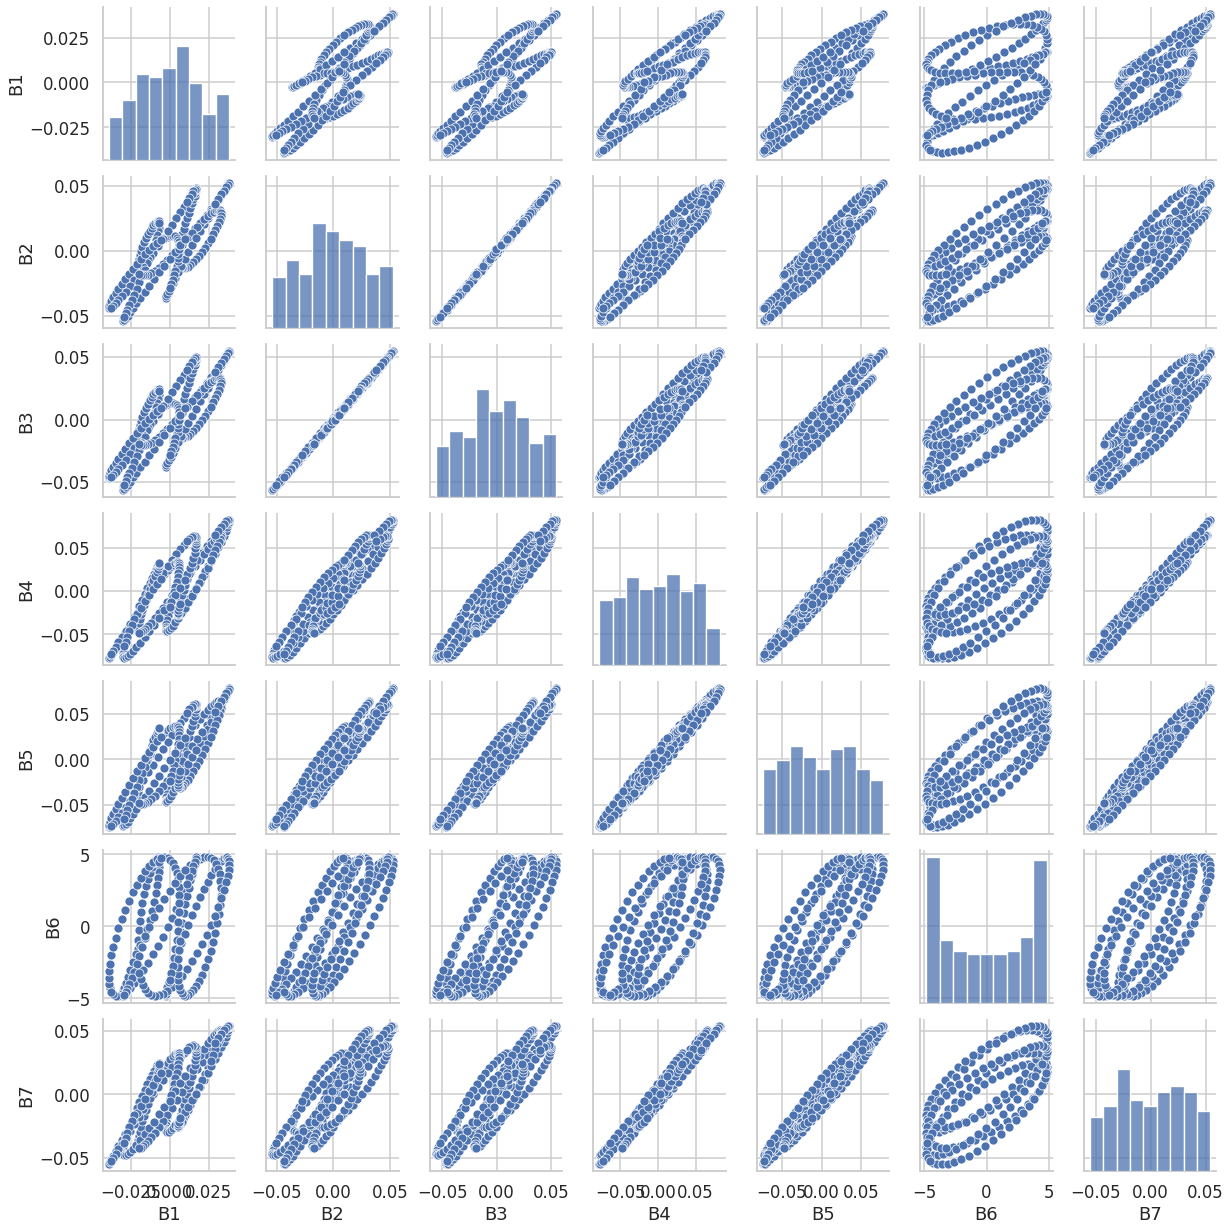

In [ ]:
#https://github.com/BioWar/Python-Machine-Learning/blob/master/Predicting%20Continuous%20Target%20Variables%20with%20Regression%20Analysis.ipynb
import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/Band_Fourier.csv')
#df.describe()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk')
cols = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6','B7']
sns_pp = sns.pairplot(df[cols], height=2.5)
plt.show()

In [ ]:
import numpy as np
fig, ax = plt.subplots()
cols = ['ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean', 'ELK_NO23F_mean','ELK_CHLA_N_mean','B1', 'B2', 'B3', 'B4', 'B5', 'B6','B7']
cm = np.corrcoef(df[cols].values.T)
sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cmap="RdBu_r",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,)
sns.set(rc = {'figure.figsize':(25,20)})
sns.set(font_scale=1)
# Next line is here in order to fix the bug
ax.set_ylim(len(cols), 0) # https://github.com/matplotlib/matplotlib/issues/14751
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

N = 10
M = 11
ylabels = ["".join(np.random.choice(list("PQRSTUVXYZ"), size=7)) for _ in range(N)]
xlabels = ["".join(np.random.choice(list("ABCDE"), size=3)) for _ in range(M)]

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = np.random.randint(0, 180, size=(N,M))
c = np.random.rand(N, M)-0.5

fig, ax = plt.subplots()

R = s/s.max()/2
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="RdYlGn")
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.grid(which='minor')

fig.colorbar(col)
plt.show()

In [ ]:

import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/Final.csv', engine='c')


df.drop('Unnamed: 0', 1, inplace=True)
corrmatrix = df.corr()
corrmatrix

c = corrmatrix.drop([ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean', 'ELK_pH_mean',	'ELK_Turb_mean',	'ELK_PO4F_mean','ELK_NH4F_mean','ELK_NO23F_mean',
                     'ELK_CHLA_N_mean'], 1).drop(['B1_mean', 'B2_mean', 'B3_mean', 'B4_mean', 'B5_mean',  'B6_mean', 'B7_mean'])


sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(8,5)})

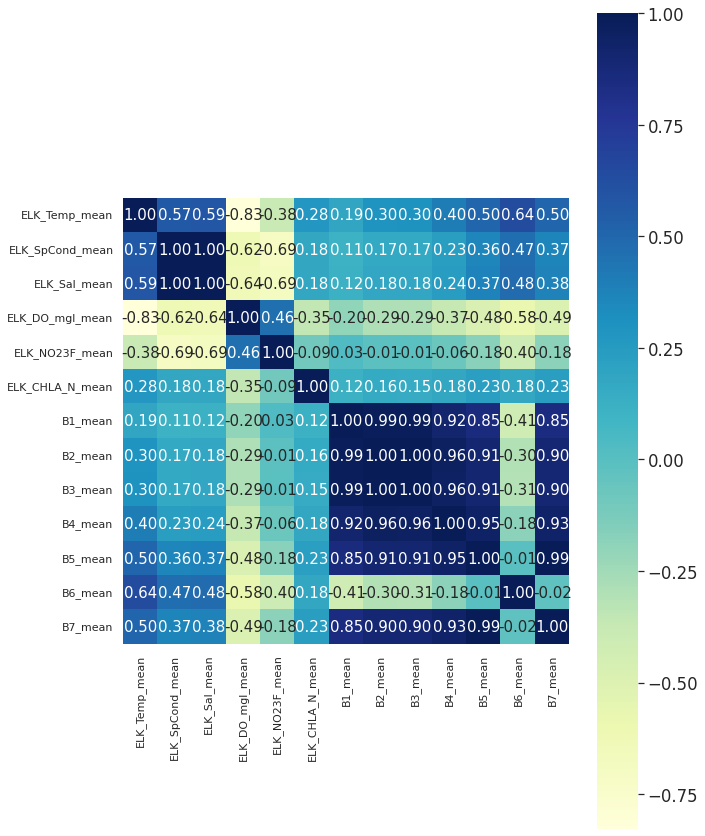

In [ ]:
df = pd.read_csv('All_Bands_CSV_files/Final.csv')
import numpy as np
fig, ax = plt.subplots()
cols = ['ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean', 'ELK_NO23F_mean','ELK_CHLA_N_mean','B1_mean', 'B2_mean', 'B3_mean', 'B4_mean', 'B5_mean', 'B6_mean','B7_mean']
cm = np.corrcoef(df[cols].values.T)
sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cmap="YlGnBu",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,)
sns.set(rc = {'figure.figsize':(8,5)})
sns.set(font_scale=1)
# Next line is here in order to fix the bug
ax.set_ylim(len(cols), 0) # https://github.com/matplotlib/matplotlib/issues/14751
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


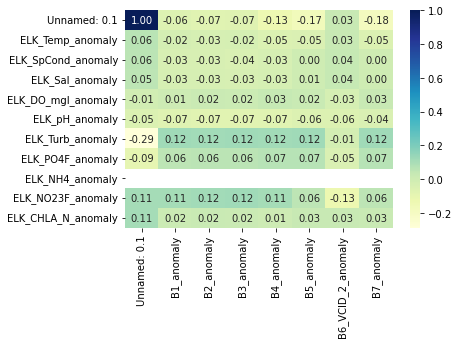

In [ ]:
import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/all_Merged_clean.csv', engine='c')


df.drop('Unnamed: 0', 1, inplace=True)
df.drop(['ELK_Temp_mean','ELK_SpCond_mean', 'ELK_Sal_mean','ELK_DO_mgl_mean', 'ELK_pH_mean', 'ELK_Turb_mean', 'ELK_PO4F_mean', 'ELK_NH4F_mean', 'ELK_NO23F_mean', 'ELK_CHLA_N_mean',
         'B1_mean', 'B2_mean', 'B3_mean', 'B4_mean', 'B5_mean', 'B6_VCID_2_mean', 'B7_mean'],1, inplace=True)
corrmatrix = df.corr()
corrmatrix

c = corrmatrix.drop([ 'ELK_Temp_anomaly',	'ELK_SpCond_anomaly',	'ELK_Sal_anomaly', 'ELK_DO_mgl_anomaly', 'ELK_pH_anomaly',	'ELK_Turb_anomaly',	'ELK_PO4F_anomaly','ELK_NH4_anomaly','ELK_NO23F_anomaly',
                     'ELK_CHLA_N_anomaly'], 1).drop(['B1_anomaly', 'B2_anomaly', 'B3_anomaly', 'B4_anomaly', 'B5_anomaly',  'B6_VCID_2_anomaly', 'B7_anomaly'])


sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(8,5)})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


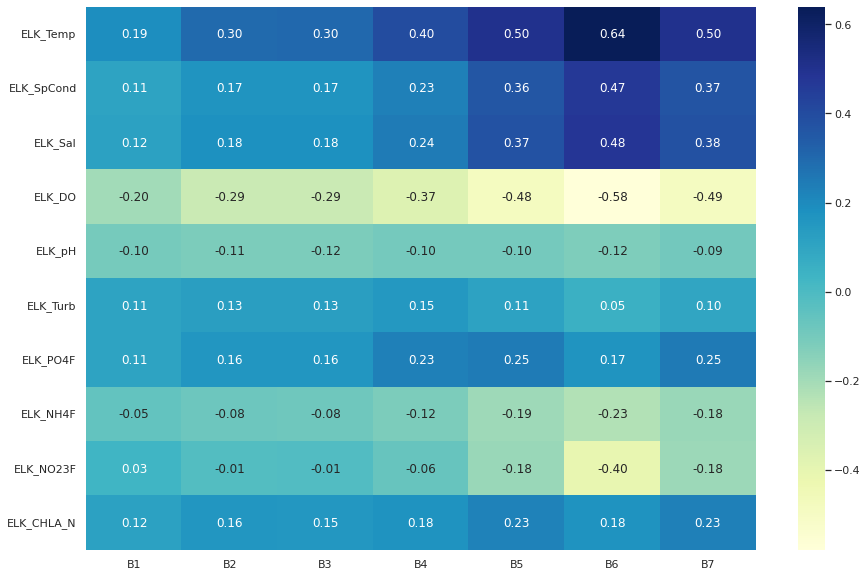

In [ ]:


import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/Final.csv')

df.rename(columns={'B1_mean': 'B1', 'B2_mean': 'B2', 'B3_mean': 'B3'
, 'B4_mean': 'B4', 'B5_mean': 'B5', 'B6_mean': 'B6'
, 'B7_mean': 'B7', 'ELK_DO_mgl_mean': 'ELK_DO', 'ELK_Temp_mean': 'ELK_Temp', 'ELK_SpCond_mean': 'ELK_SpCond',
'ELK_Sal_mean': 'ELK_Sal', 'ELK_NO23F_mean': 'ELK_NO23F', 'ELK_PO4F_mean': 'ELK_PO4F', 'ELK_NH4F_mean': 'ELK_NH4F'
, 'ELK_CHLA_N_mean': 'ELK_CHLA_N', 'ELK_Turb_mean': 'ELK_Turb', 'ELK_pH_mean':'ELK_pH'}, inplace=True)
df.head(5)
df.drop('Unnamed: 0', 1, inplace=True)
corrmatrix = df.corr()
corrmatrix

c = corrmatrix.drop([ 'ELK_Temp',	'ELK_SpCond',	'ELK_Sal', 'ELK_DO', 'ELK_pH',	'ELK_Turb',	'ELK_PO4F','ELK_NH4F','ELK_NO23F',
                     'ELK_CHLA_N'], 1).drop(['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7'])




sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(10,8)})

In [ ]:


import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/Final.csv')

df.rename(columns={'B1_mean': 'B1', 'B2_mean': 'B2', 'B3_mean': 'B3'
, 'B4_mean': 'B4', 'B5_mean': 'B5', 'B6_mean': 'B6'
, 'B7_mean': 'B7', 'ELK_DO_mgl_mean': 'ELK_DO', 'ELK_Temp_mean': 'ELK_Temp', 'ELK_SpCond_mean': 'ELK_SpCond',
'ELK_Sal_mean': 'ELK_Sal', 'ELK_NO23F_mean': 'ELK_NO23F', 'ELK_PO4F_mean': 'ELK_PO4F', 'ELK_NH4F_mean': 'ELK_NH4F'
, 'ELK_CHLA_N_mean': 'ELK_CHLA_N', 'ELK_Turb_mean': 'ELK_Turb', 'ELK_pH_mean':'ELK_pH'}, inplace=True)
df.head(5)
df.drop('Unnamed: 0', 1, inplace=True)
corrmatrix = df.corr()
corrmatrix

c = corrmatrix.drop([ 'ELK_Temp',	'ELK_SpCond',	'ELK_Sal', 'ELK_DO', 'ELK_pH',	'ELK_Turb',	'ELK_PO4F','ELK_NH4F','ELK_NO23F',
                     'ELK_CHLA_N'], 1).drop(['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7'])




sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(10,8)})

In [ ]:
import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/Band_Fourier.csv')

inputs = df[['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7']]
outputs = df[[ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean']]
df.drop('Unnamed: 0', 1, inplace=True)
corrmatrix = df.corr(method='kendall')
corrmatrix

c = corrmatrix.drop([ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean', 'ELK_pH_mean',	'ELK_Turb_mean',	'ELK_PO4F_mean','ELK_NH4F_mean','ELK_NO23F_mean',
                     'ELK_CHLA_N_mean'], 1).drop(['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7'])
c


sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(8,5)})



In [ ]:
import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/Band_Fourier.csv')

inputs = df[['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7']]
outputs = df[[ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean']]
df.drop('Unnamed: 0', 1, inplace=True)
corrmatrix = df.corr(method='spearman')
corrmatrix

c = corrmatrix.drop([ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean', 'ELK_pH_mean',	'ELK_Turb_mean',	'ELK_PO4F_mean','ELK_NH4F_mean','ELK_NO23F_mean',
                     'ELK_CHLA_N_mean'], 1).drop(['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7'])
c


sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(8,5)})

In [ ]:
import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/1_Band_Fourier.csv')

inputs = df[['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7']]
outputs = df[[ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean']]
#df.drop('Unnamed: 0', 1, inplace=True)
corrmatrix = df.corr(method='spearman')
corrmatrix

c = corrmatrix.drop([ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean', 'ELK_pH_mean',	'ELK_Turb_mean',	'ELK_PO4F_mean','ELK_NH4F_mean','ELK_NO23F_mean',
                     'ELK_CHLA_N_mean'], 1).drop(['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7'])
c


sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(8,5)})

In [ ]:
import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/2_Band_Fourier.csv')

inputs = df[['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7']]
outputs = df[[ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean']]
#df.drop('Unnamed: 0', 1, inplace=True)
corrmatrix = df.corr(method='spearman')
corrmatrix

c = corrmatrix.drop([ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean', 'ELK_pH_mean',	'ELK_Turb_mean',	'ELK_PO4F_mean','ELK_NH4F_mean','ELK_NO23F_mean',
                     'ELK_CHLA_N_mean'], 1).drop(['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7'])
c


sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(8,5)})

In [ ]:
import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/3_Band_Fourier.csv')

inputs = df[['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7']]
outputs = df[[ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean']]
#df.drop('Unnamed: 0', 1, inplace=True)
corrmatrix = df.corr(method='spearman')
corrmatrix

c = corrmatrix.drop([ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean', 'ELK_pH_mean',	'ELK_Turb_mean',	'ELK_PO4F_mean','ELK_NH4F_mean','ELK_NO23F_mean',
                     'ELK_CHLA_N_mean'], 1).drop(['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7'])
c


sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(8,5)})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


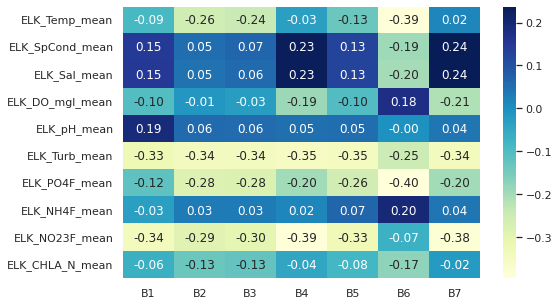

In [ ]:
import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/4_Band_Fourier.csv')

inputs = df[['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7']]
outputs = df[[ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean']]
#df.drop('Unnamed: 0', 1, inplace=True)
corrmatrix = df.corr(method='spearman')
corrmatrix

c = corrmatrix.drop([ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean', 'ELK_pH_mean',	'ELK_Turb_mean',	'ELK_PO4F_mean','ELK_NH4F_mean','ELK_NO23F_mean',
                     'ELK_CHLA_N_mean'], 1).drop(['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7'])
c


sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(8,5)})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


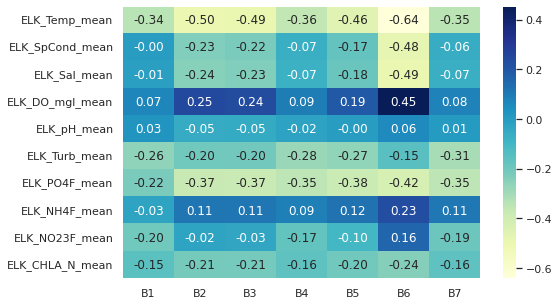

In [ ]:
import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/5_Band_Fourier.csv')

inputs = df[['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7']]
outputs = df[[ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean']]
#df.drop('Unnamed: 0', 1, inplace=True)
corrmatrix = df.corr(method='spearman')
corrmatrix

c = corrmatrix.drop([ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean', 'ELK_pH_mean',	'ELK_Turb_mean',	'ELK_PO4F_mean','ELK_NH4F_mean','ELK_NO23F_mean',
                     'ELK_CHLA_N_mean'], 1).drop(['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7'])
c


sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(8,5)})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


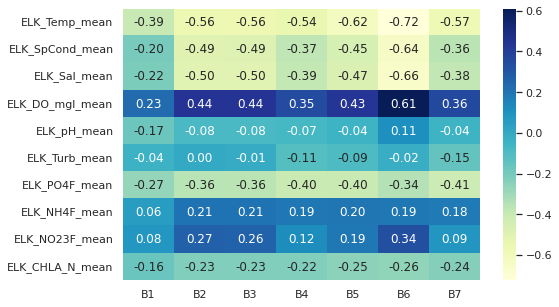

In [ ]:
import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/6_Band_Fourier.csv')

inputs = df[['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7']]
outputs = df[[ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean']]
#df.drop('Unnamed: 0', 1, inplace=True)
corrmatrix = df.corr(method='spearman')
corrmatrix

c = corrmatrix.drop([ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean', 'ELK_pH_mean',	'ELK_Turb_mean',	'ELK_PO4F_mean','ELK_NH4F_mean','ELK_NO23F_mean',
                     'ELK_CHLA_N_mean'], 1).drop(['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7'])
c


sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(8,5)})

In [ ]:
import pandas as pd
df = pd.read_csv('All_Bands_CSV_files/6_Band_Fourier.csv')

inputs = df[['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7']]
outputs = df[[ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean']]
#df.drop('Unnamed: 0', 1, inplace=True)
corrmatrix = df.corr(method='spearman')
corrmatrix

c = corrmatrix.drop([ 'ELK_Temp_mean',	'ELK_SpCond_mean',	'ELK_Sal_mean', 'ELK_DO_mgl_mean', 'ELK_pH_mean',	'ELK_Turb_mean',	'ELK_PO4F_mean','ELK_NH4F_mean','ELK_NO23F_mean',
                     'ELK_CHLA_N_mean'], 1).drop(['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7'])
c


sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
sns.set(rc = {'figure.figsize':(8,5)})